In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy as np

from pyscisci.datasource.APS import APS
from pyscisci.metrics import compute_raostriling_interdisciplinarity

import matplotlib.pylab as plt

path2aps = '/Volumes/GatesExpansionDrive/DataSets/APS/APS2019'

In [3]:
pub2ref_df = [[11, 0], [11, 1], [11, 2], [11, 3]]
pub2ref_df += [[12, 0], [12, 2], [12, 3]] 
pub2ref_df += [[13, 0], [13, 2], [13, 4]]
pub2ref_df += [[14, 0]]
pub2ref_df += [[15, 0], [15, 2], [15, 3], [15, 4]] # d5 citations
pub2ref_df = pd.DataFrame(pub2ref_df, columns = ['CitingPublicationId', 'CitedPublicationId'])

pub2field_df = [[0, 1], [0, 2], [1, 1], [2,3], [3,2], [3,3], [4,3], 
                [11, 1], [12, 3], [13, 3], [14, 1], [15, 1], [15, 2]]
pub2field_df = pd.DataFrame(pub2field_df, columns = ['PublicationId', 'FieldId'])

pub2rs, precomputed_distance_matrix, field2int = compute_raostriling_interdisciplinarity(pub2ref_df, pub2field_df, 
                                        focus_pub_ids=None, 
                                        pub2field_norm=True, temporal=False,
                                        citation_direction='references', field_distance_metric='cosine', 
                                        precomputed_distance_matrix=None, show_progress=False)

# first lets look at the field2field distance matrix
pub2rs
# it was formed by 1) making a bipartite matrix of all the reference fields for each of the citing fields
#        Field1, Field2, Field3
# Field1 
# Field2
# Field3
#print(precomputed_distance_matrix)

,PublicationId,RaoStirling
0,0,0.020387
1,1,0.012410
2,2,0.011382
3,3,0.026113
4,4,0.009458


In [4]:
myaps = APS(path2aps)

In [5]:
pub2field_df = myaps.pub2field_df
pub2ref_df = myaps.pub2ref_df

In [6]:
pub2rs, precomputed_distance_matrix, field2int = compute_raostriling_interdisciplinarity(pub2ref_df, pub2field_df, 
                                        focus_pub_ids=None, 
                                        pub2field_norm=True, temporal=False,
                                        citation_direction='references', field_distance_metric='cosine', 
                                        precomputed_distance_matrix=None, show_progress=False)

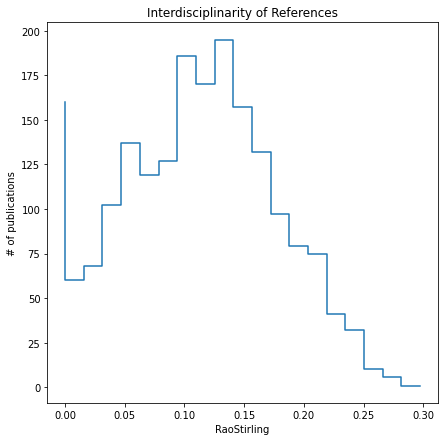

In [7]:
rsdist, rsbins = np.histogram(pub2rs['RaoStirling'].values, bins=20)

fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.step(rsbins[:-1], rsdist)
ax.set_title('Interdisciplinarity of References')
ax.set_xlabel('RaoStirling')
ax.set_ylabel('# of publications')
plt.show()

In [8]:
pub2rs, precomputed_distance_matrix, field2int = compute_raostriling_interdisciplinarity(pub2ref_df, pub2field_df, 
                                        focus_pub_ids=None, 
                                        pub2field_norm=True, temporal=False,
                                        citation_direction='citations', field_distance_metric='cosine', 
                                        precomputed_distance_matrix=None, show_progress=False)

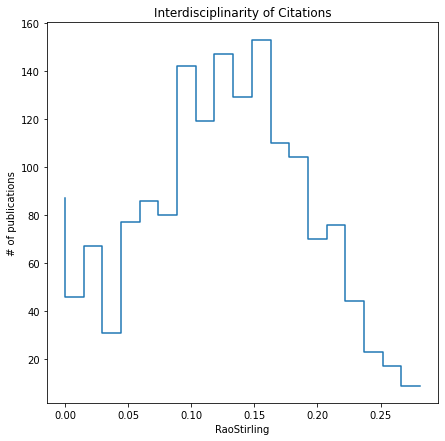

In [9]:
rsdist, rsbins = np.histogram(pub2rs['RaoStirling'].values, bins=20)

fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.step(rsbins[:-1], rsdist)
ax.set_title('Interdisciplinarity of Citations')
ax.set_xlabel('RaoStirling')
ax.set_ylabel('# of publications')
plt.show()